<a href="https://colab.research.google.com/github/hejiang2/datacamp-courses/blob/master/Visualizing_Time_Series_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
url_meat = 'https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/Visualizing%20Time%20Series%20Data%20in%20Python/ch4_meat.csv'
# Read in meat DataFrame
meat = pd.read_csv(url_meat)

# Review the first five lines of the meat DataFrame
print(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

         date   beef   veal  ...  broilers  other_chicken  turkey
0  1944-01-01  751.0   85.0  ...       NaN            NaN     NaN
1  1944-02-01  713.0   77.0  ...       NaN            NaN     NaN
2  1944-03-01  741.0   90.0  ...       NaN            NaN     NaN
3  1944-04-01  650.0   89.0  ...       NaN            NaN     NaN
4  1944-05-01  681.0  106.0  ...       NaN            NaN     NaN

[5 rows x 8 columns]
              beef        veal  ...  other_chicken      turkey
count   827.000000  827.000000  ...     143.000000  635.000000
mean   1683.463362   54.198549  ...      43.033566  292.814646
std     501.698480   39.062804  ...       3.867141  162.482638
min     366.000000    8.800000  ...      32.300000   12.400000
25%    1231.500000   24.000000  ...      40.200000  154.150000
50%    1853.000000   40.000000  ...      43.400000  278.300000
75%    2070.000000   79.000000  ...      45.650000  449.150000
max    2512.000000  215.000000  ...      51.100000  585.100000

[8 rows x 7 co

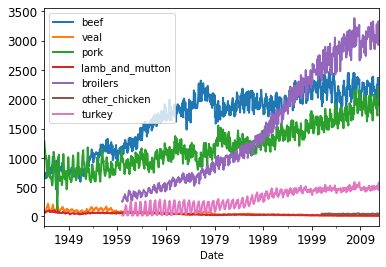

In [13]:
import matplotlib.pyplot as plt
# Plot time series dataset
ax = meat.plot(linewidth=2, fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=10)

# Show plot
plt.show()

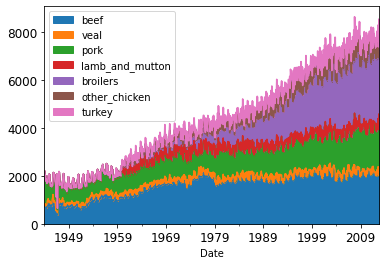

In [14]:
# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=10)

# Show plot
plt.show()

When visualizing multiple time series, it can be difficult to differentiate between various colors in the default color scheme.

To remedy this, you can define each color manually, but this may be time-consuming. Fortunately, it is possible to leverage the colormap argument to .plot() to automatically assign specific color palettes with varying contrasts. You can either provide a matplotlib colormap as an input to this parameter, or provide one of the default strings that is available in the colormap() function available in matplotlib.

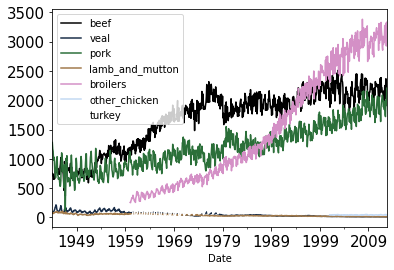

In [16]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=10)

# Show plot
plt.show()

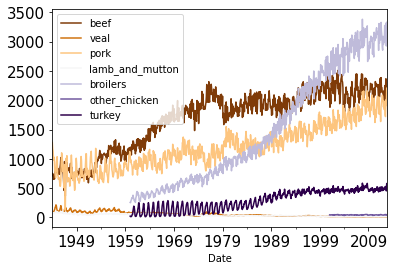

In [17]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=10)

# Show plot
plt.show()

The correlation matrix generated can be plotted using a heatmap. To do so, you can leverage the heatmap() function from the seaborn library which contains several arguments to tailor the look of your heatmap.

You can use the .xticks() and .yticks() methods to rotate the axis labels so they don't overlap.


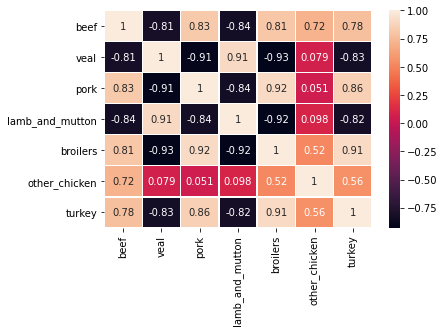

In [18]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap.

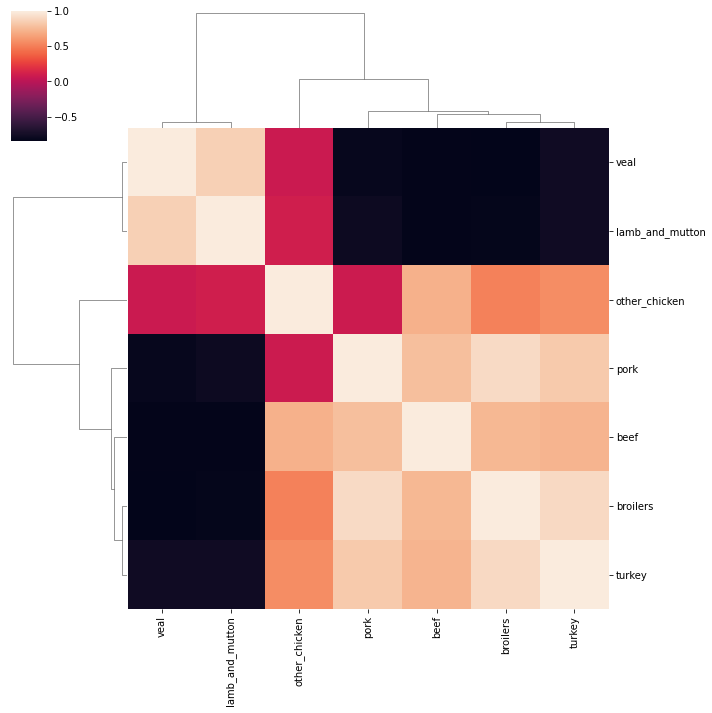

In [19]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [20]:
import pandas as pd
url_jobs = 'https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/Visualizing%20Time%20Series%20Data%20in%20Python/ch5_employment.csv'
# Read in jobs file
jobs = pd.read_csv(url_jobs)

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

    datestamp  ...  Wholesale and Retail Trade
0  2000-01-01  ...                         5.0
1  2000-02-01  ...                         5.2
2  2000-03-01  ...                         5.1
3  2000-04-01  ...                         4.1
4  2000-05-01  ...                         4.3

[5 rows x 17 columns]
datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Tr

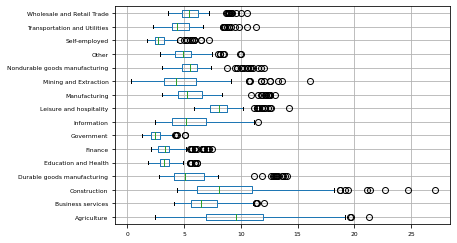

       Agriculture  ...  Wholesale and Retail Trade
count   122.000000  ...                  122.000000
mean      9.840984  ...                    5.766393
std       3.962067  ...                    1.463417
min       2.400000  ...                    3.600000
25%       6.900000  ...                    4.800000
50%       9.600000  ...                    5.400000
75%      11.950000  ...                    6.200000
max      21.300000  ...                   10.500000

[8 rows x 16 columns]


In [21]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


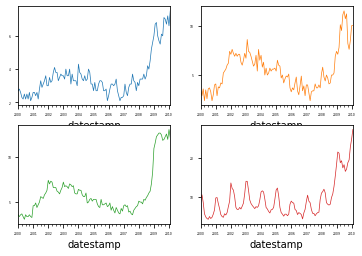

In [22]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head())

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

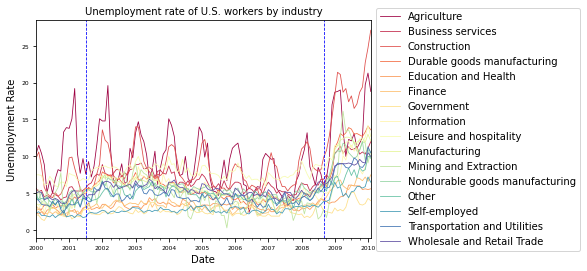

In [23]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

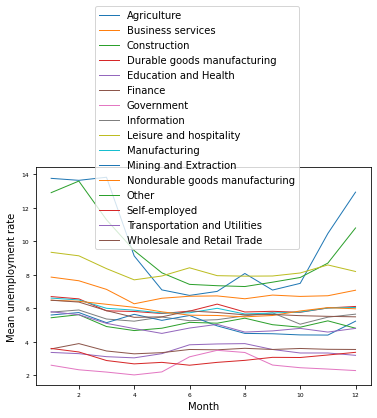

In [27]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

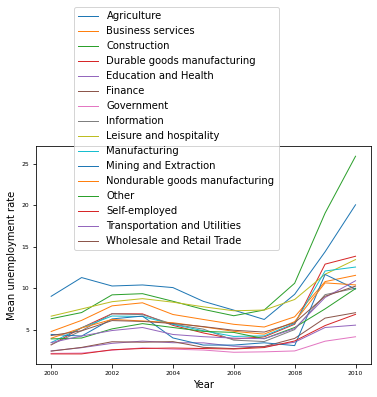

In [28]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

In [30]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

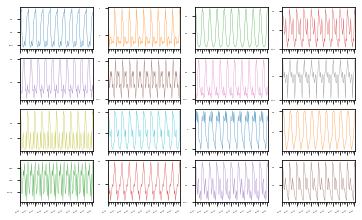

In [31]:
# Initialize dictionary
jobs_seasonal = {}

# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()

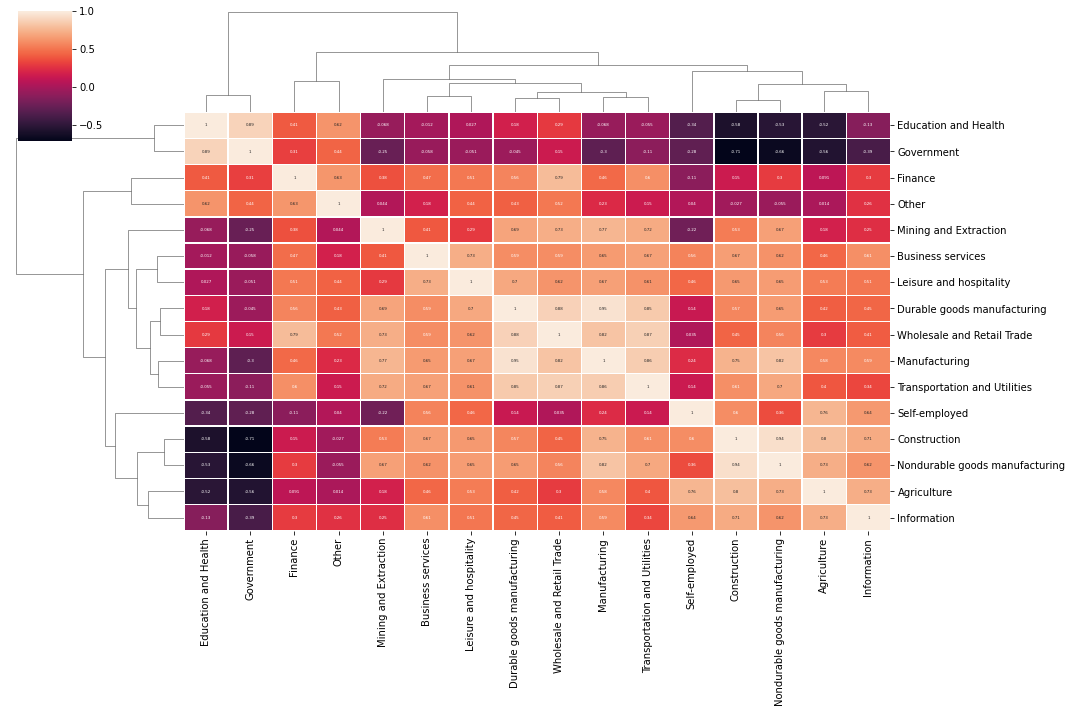

In [32]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()